# Model training: Multinomial NB

In [1]:
import pickle
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("processed/vectors_train.pickle",'rb') as file:
    vectors_train = pickle.load(file)

with open("processed/y_train.pickle",'rb') as file:
    y_train = pickle.load(file)
    
with open("processed/vectors_test.pickle",'rb') as file:
    vectors_test = pickle.load(file)
    
with open("processed/y_test.pickle",'rb') as file:
    y_test = pickle.load(file)

In [3]:
multiNB = MultinomialNB()
multiNB.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [4]:
multiNB.fit(vectors_train, y_train)
y_pred = multiNB.predict(vectors_test)

# check accuracy on training and test
training_score = accuracy_score(y_train, multiNB.predict(vectors_train))
test_score = accuracy_score(y_test, y_pred)
print(f"Training accuracy: {training_score}")
print(f"Test accuracy: {test_score}")

Training accuracy: 0.8873585833743236
Test accuracy: 0.8628318584070797


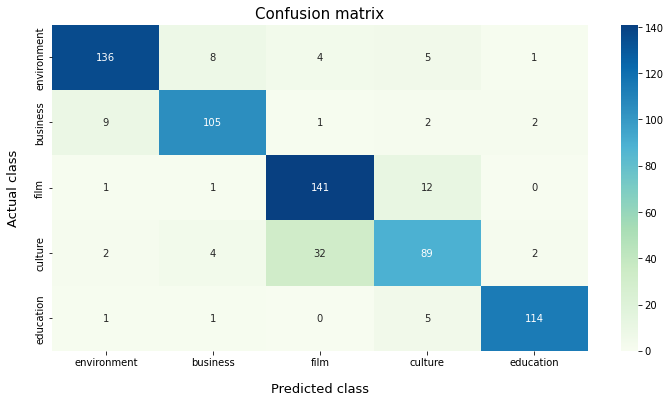

In [5]:
target_names = ['environment', 'business', 'film', 'culture', 'education']

plt.figure(figsize=(12,6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
            xticklabels=target_names,
            yticklabels=target_names,
            annot=True,
            fmt='d',
            cmap='GnBu')
ax.set_title("Confusion matrix", fontsize=15)
ax.set_xlabel('Predicted class', labelpad=15., fontsize=13);
ax.set_ylabel('Actual class', labelpad=15., fontsize=13);

In [6]:
summary = pd.DataFrame(data=
                      {'Model name': 'MultiNB',
                       'Training score': training_score,
                       'Test score': test_score},
                       index=[0])
summary

,Model name,Training score,Test score
0,MultiNB,0.887359,0.862832


In [7]:
with open("models/best_NB.pickle", 'wb') as file:
    pickle.dump(multiNB, file)
    
with open("models/summary_NB.pickle", 'wb') as file:
    pickle.dump(summary, file)